In [1]:
import matplotlib as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import csv
import random
import statistics

In [3]:
import networkx as nx
import random

def barabasi_albert_graph(n, m):
    # Initialize the network with m nodes
    G = nx.complete_graph(m)

    # Add edges incrementally to grow the network
    for i in range(m, n):
        # Calculate probability distribution based on node degrees
        total_degree = sum(G.degree(node) for node in G.nodes())
        probability_distribution = [G.degree(node) / total_degree for node in G.nodes()]

        # Select m nodes based on the probability distribution
        selected_nodes = random.choices(list(G.nodes()), weights=probability_distribution, k=m)

        # Add edges between the new node and the selected nodes
        for node in selected_nodes:
            G.add_edge(i, node)

    return G

# Generate a scale-free network with 10,000 nodes using the BA algorithm
S = barabasi_albert_graph(10000, 5)


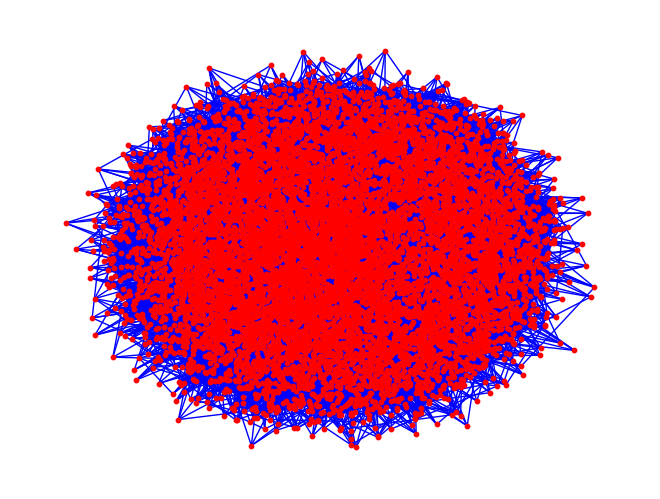

In [ ]:
nx.draw(S, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

In [ ]:
print("No. of Nodes:",nx.number_of_nodes(S))


No. of Nodes: 10000


In [ ]:
print("No. of Edges:",nx.number_of_edges(S))


No. of Edges: 49853


In [ ]:

average_degree = sum(degree for node, degree in nx.degree(S))/len(S.nodes())

In [ ]:
print("Average Degree:",average_degree)

Average Degree: 9.9706


In [ ]:
degree_dist = nx.degree_histogram(S)


In [ ]:
print(degree_dist)
print(type(degree_dist))

[0, 0, 0, 0, 16, 2875, 1773, 1181, 802, 603, 457, 348, 275, 244, 184, 139, 114, 97, 81, 75, 62, 64, 41, 42, 42, 35, 37, 28, 25, 16, 16, 15, 29, 14, 16, 16, 12, 12, 9, 15, 10, 8, 9, 8, 4, 7, 6, 8, 5, 6, 2, 5, 7, 6, 4, 2, 2, 1, 2, 3, 4, 5, 3, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 1, 1, 3, 3, 2, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
<class 'list'>


In [ ]:

from collections import Counter

In [ ]:
degree_counts = Counter(degree_dist)
degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

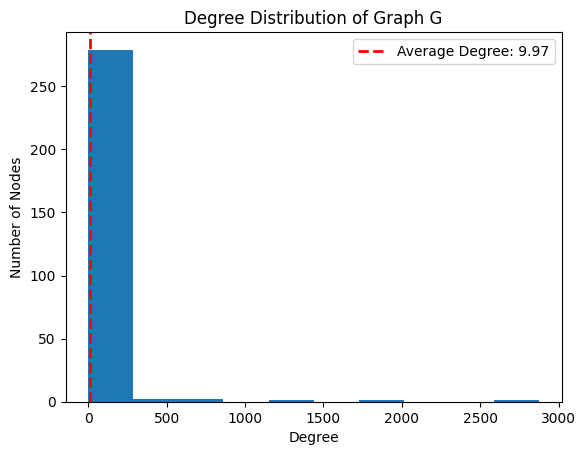

In [ ]:
plt.hist(degree_dist)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of Graph G")
plt.axvline(x=average_degree, color='r', linestyle='dashed', linewidth=2, label=f'Average Degree: {average_degree:.2f}')
plt.legend()
plt.show()

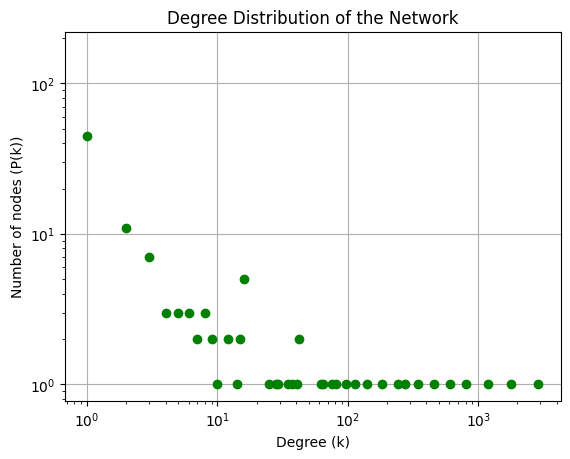

In [ ]:
# Plot the degree distribution on a log-log scale
plt.loglog(degrees, counts, marker='o',  linestyle='', color='g')
plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes (P(k))")
plt.title("Degree Distribution of the Network")
plt.grid(True)
plt.show()


Min Degree:  0
Max Degree:  2875


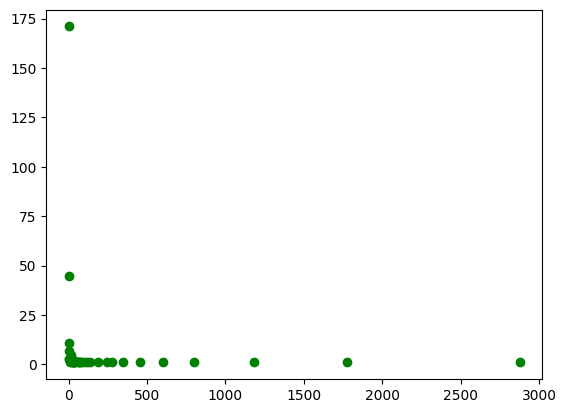

In [ ]:
plt.plot(degrees, counts, marker='o',  linestyle='', color='g')
print('Min Degree: ',min(degrees))
print('Max Degree: ',max(degrees))

In [ ]:
standard_deviation_degrees = statistics.stdev(degrees)

In [ ]:
print('Standard Deviation of Degree Distribution: ',standard_deviation_degrees)

Standard Deviation of Degree Distribution:  560.9443707218519


In [ ]:

degree_centrality = nx.degree_centrality(S)

# Find the node with the maximum degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_degree_value = degree_centrality[max_degree_node]

# Print results

print("Maximum Degree Centrality:")
print(f"Node: {max_degree_node}, Degree: {max_degree_value}")


print("\nDegree of Some Nodes (Top 25):")
count = 0
for node, centrality in degree_centrality.items():
    if count < 25:
        print(f"{node}\t{centrality}")
        count += 1


Maximum Degree Centrality:
Node: 0, Degree: 0.028502850285028504

Degree of Some Nodes (Top 25):
0	0.028502850285028504
1	0.017501750175017504
2	0.020302030203020304
3	0.014401440144014403
4	0.027902790279027905
5	0.020702070207020702
6	0.013001300130013002
7	0.023702370237023703
8	0.0215021502150215
9	0.023802380238023804
10	0.019001900190019003
11	0.010301030103010301
12	0.019701970197019702
13	0.012301230123012302
14	0.007500750075007501
15	0.014901490149014903
16	0.007600760076007601
17	0.015501550155015502
18	0.013801380138013802
19	0.015401540154015403
20	0.021702170217021702
21	0.0093009300930093
22	0.016501650165016504
23	0.021902190219021903
24	0.006900690069006901


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


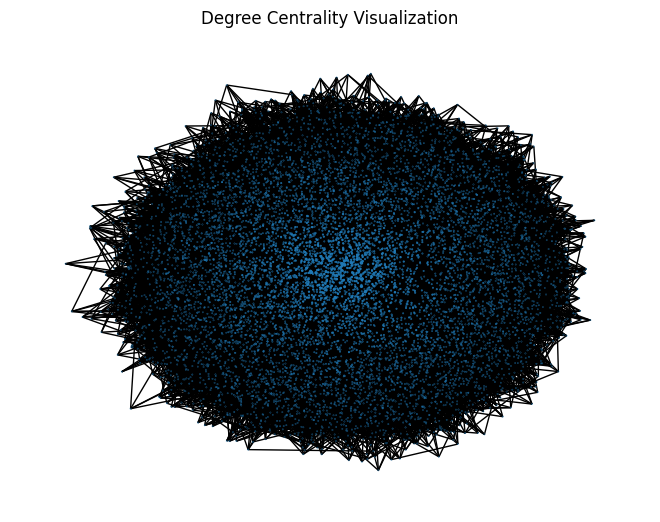

In [ ]:
# Visualization (Adjust node sizes based on degree centrality)
node_size = [degree_centrality[v] * 100 for v in S.nodes()]  # Scale node size by centrality

cmap = plt.cm.plasma

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(S, nodelist=S.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Degree Centrality Visualization")
plt.show()

In [ ]:
eigen_centrality_value = nx.eigenvector_centrality_numpy(S)
maximum = max(eigen_centrality_value.values())
print("Maximum eigen centrality are :")
print("Node Eigen Vector Centrality")
for node in eigen_centrality_value.keys():
  if (eigen_centrality_value[node] == maximum):
    print(f'{node}\t {eigen_centrality_value[node]}')
print("\nEigen Vector Centrality of some nodes are:\n")
print("Node \t Eigen Vector Centrality")
# sorting based on values
eigen_centrality_sorted = sorted(eigen_centrality_value, key=eigen_centrality_value.get, reverse=True)
w = 1
for q in eigen_centrality_value:
  if(w <= 25):
    w = w + 1
    print (str(q)+"\t "+str(eigen_centrality_value[q]))

Maximum eigen centrality are :
Node Eigen Vector Centrality
0	 0.23920773741713072

Eigen Vector Centrality of some nodes are:

Node 	 Eigen Vector Centrality
0	 0.23920773741713072
1	 0.15193473846571576
2	 0.17599519904331384
3	 0.09451187506537846
4	 0.21107959707996746
5	 0.12565166979529413
6	 0.07927295323404887
7	 0.17734382357938522
8	 0.1595347600401776
9	 0.17451648480572254
10	 0.14754661933883068
11	 0.05688574882413571
12	 0.12259304173458485
13	 0.07034216275376226
14	 0.04836867218021417
15	 0.08691656651793683
16	 0.0575026094177421
17	 0.09910990491413753
18	 0.07333682800511769
19	 0.09731292790949703
20	 0.14245910797971462
21	 0.06113591703275905
22	 0.07842290585330751
23	 0.11960734884367799
24	 0.05322109974515027


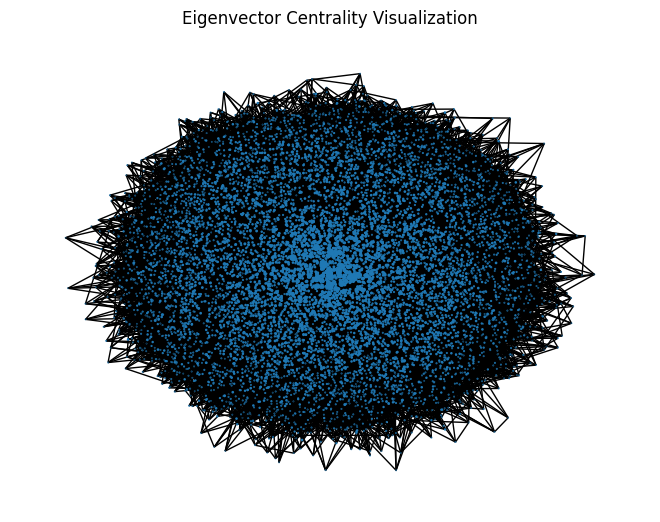

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in eigen_centrality_value.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(S, nodelist=S.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Eigenvector Centrality Visualization")
plt.show()

In [ ]:
# take sample graph for 4000 edges

df=nx.to_pandas_edgelist(S);
df_sample=df.sample(n=4000)

g=nx.from_pandas_edgelist(df_sample)
print("No. of Nodes:",nx.number_of_nodes(g))
print("No. of Edges:",nx.number_of_edges(g))

No. of Nodes: 4878
No. of Edges: 4000


In [ ]:
# Define alpha and beta parameters (adjust as needed)
alpha = 0.1  # Damping factor
beta = 1  # Node contribution

# Calculate Katz centrality
katz_cent = nx.katz_centrality(g, alpha=alpha, beta=beta,max_iter=10000)
index = max(nx.katz_centrality(g, max_iter = 20000), key = (nx.katz_centrality(g, max_iter = 20000)).get)
maximum = katz_cent[index]
print("The nodes with maximum Katz centrality are :")
print("\nNode Degree")
for node in katz_cent:
  if (katz_cent[node] == maximum):
    print(f'{node}\t{katz_cent[node]}')
print("\nSome nodes with their Katz Centrality are:")
print("\nNode Katz Centrality")
w = 1
for node in katz_cent:
  if(w <= 25):
    print(f'{node}\t{katz_cent[node]}')
    w = w + 1

The nodes with maximum Katz centrality are :

Node Degree
20	0.058039766429591126

Some nodes with their Katz Centrality are:

Node Katz Centrality
8243	0.015139408669064986
8473	0.014171186529857903
1028	0.01716486399344364
3399	0.014375777983333062
17	0.029805763423052713
266	0.015928706507852258
4634	0.012641953338323296
6626	0.012641953338323296
375	0.02179159372957112
7690	0.013556917373186978
2948	0.01406239753363995
3366	0.01406239753363995
21	0.028883611065392445
4603	0.014266118456299971
410	0.015248541655500814
7035	0.0129026121700403
3957	0.012641953338323296
5999	0.012641953338323296
1017	0.01691743111073249
1470	0.014763405559482797
2959	0.015673038161098714
3598	0.015374626824277966
2161	0.012641953338323296
4610	0.012641953338323296
2998	0.01406239753363995


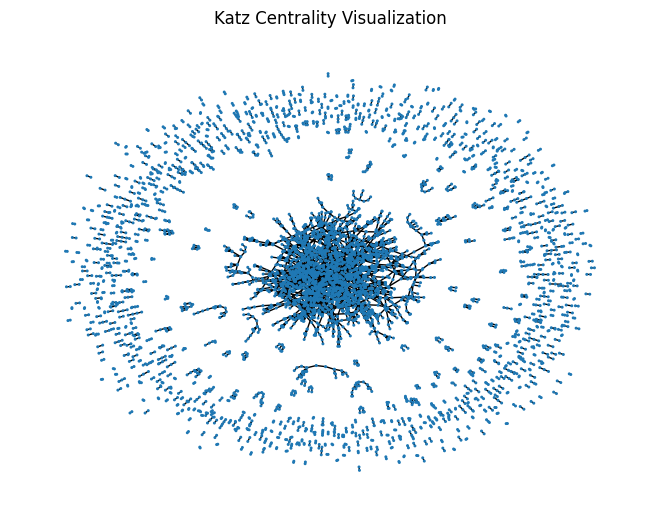

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in katz_cent.values()]  # Scale node size by centrality

# in statement above, katz_cent if cell above to above cell works




# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(g, nodelist=g.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Katz Centrality Visualization")
plt.show()

In [ ]:
#Page Rank
Page_Rank = nx.pagerank(S, max_iter = 20000)
maximum = max(Page_Rank.values())
print("Maximum Page Rank centrality are :")
print("\nNode Page Rank Centrality")
for node in Page_Rank.keys():
  if (Page_Rank[node] == maximum):
    print(f'{node}\t{Page_Rank[node]}')
print("\nPage Rank Centrality of some nodes are:")
print("\nNode Page Rank Centrality")
w = 1
for node in Page_Rank:
  if(w <= 25):
    print(f'{node}\t{Page_Rank[node]}')
    w = w + 1

Maximum Page Rank centrality are :

Node Page Rank Centrality
0	0.002422135271348935

Page Rank Centrality of some nodes are:

Node Page Rank Centrality
0	0.002422135271348935
1	0.0014979513201199145
2	0.0017396415140254226
3	0.0012482577941396445
4	0.00238443595043885
5	0.0017990967396334537
6	0.001124499387229447
7	0.0020203547303936638
8	0.0018501555294181426
9	0.0020327363441406386
10	0.0016095673288092673
11	0.0008874644476968344
12	0.0017033497819859422
13	0.001063319383795699
14	0.0006560062074971812
15	0.0012899890340406853
16	0.0006625732951473841
17	0.0013255117143048287
18	0.0012005885824696555
19	0.0013364988573319875
20	0.0018565793450123008
21	0.0008016085666383957
22	0.0014253329765034945
23	0.001882915221628711
24	0.0006024366584403757


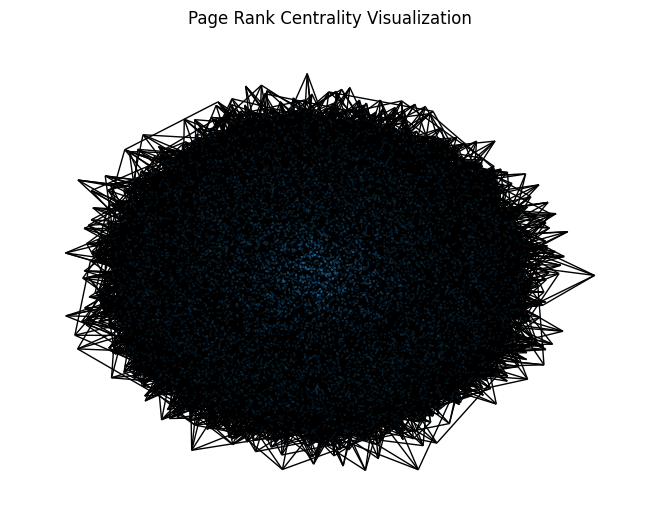

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in Page_Rank.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(S, nodelist=S.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Page Rank Centrality Visualization")
plt.show()

In [ ]:
#Betweeness Centrality
bet_cent = nx.betweenness_centrality(S)
maximum = max(bet_cent.values())
print("Maximum Betweeness Centrality are :")
print("\nNode Betweeness Centrality")
for node in bet_cent:
  if (bet_cent[node] == maximum):
    print(f'{node}\t{bet_cent[node]}')
print("\nBetweeness Centrality of some nodes are:")
print("\nNode Betweenness Centrality")
w = 1
for res in bet_cent:
  if(w <= 25):
    w = w+1
    print(str(res)+"\t"+str(bet_cent[res]))

Maximum Betweeness Centrality are :

Node Betweeness Centrality
0	0.05633098613847968

Betweeness Centrality of some nodes are:

Node Betweenness Centrality
0	0.05633098613847968
1	0.02633097754146309
2	0.033507409717818744
3	0.016845227172458028
4	0.04743364080071515
5	0.029951851192534136
6	0.015904897369465164
7	0.040217904372050854
8	0.03359783515506187
9	0.041330571570521245
10	0.031026547105293463
11	0.010343217754091838
12	0.028390933109558765
13	0.013196618579400268
14	0.0060057494587898224
15	0.01732080146269565
16	0.007075544875554278
17	0.02022777342630475
18	0.016535198275149453
19	0.019317547284041635
20	0.033999828053008795
21	0.009266738833848605
22	0.019218058475945852
23	0.031976761206015794
24	0.005540513409105081


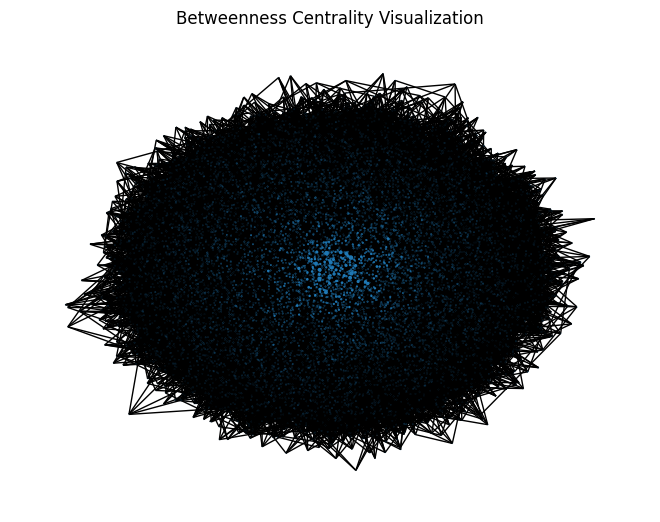

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in bet_cent.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(S, nodelist=S.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Betweenness Centrality Visualization")
plt.show()

In [ ]:
#Closeness Centrality
Closeness_Centrality = nx.closeness_centrality(S)
maxi = max(Closeness_Centrality.values())
print("Maximum Closeness Centrality:")
print("\nNode Closeness Centrality")
for node in Closeness_Centrality:
  if (Closeness_Centrality[node] == maxi):
    print(f'{node}\t{Closeness_Centrality[node]}')
print("\nCloseness Centrality of some nodes:")
print("\nNode Closeness Centrality")
dict_sorted_keys = sorted(Closeness_Centrality, key=Closeness_Centrality.get, reverse=True)
w = 1
for q in dict_sorted_keys:
  if(w <= 25):
    w = w+1
    print (str(q)+"\t"+str(Closeness_Centrality[q]))

Maximum Closeness Centrality:

Node Closeness Centrality
0	0.3987478066677301

Closeness Centrality of some nodes:

Node Closeness Centrality
0	0.3987478066677301
4	0.3902657975879162
7	0.38745301662339676
9	0.38671875
2	0.38656924147529576
10	0.38272219245196354
8	0.3815684029765312
1	0.3814373998626688
20	0.3801178483178103
5	0.37529557482265513
12	0.37492969365180545
23	0.3739761379361933
17	0.3677725467117846
19	0.3658081510207068
6	0.3624927494199536
3	0.3622432344310401
27	0.3620596009704168
35	0.3617190608834063
15	0.3614183474300586
22	0.35974096060442523
18	0.35789963490586296
43	0.3570816370259267
25	0.3567249375668926
32	0.356661316211878
13	0.3554820819112628


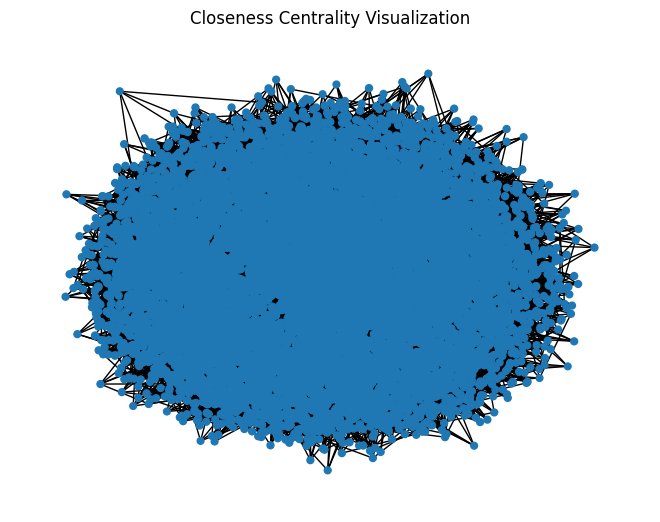

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in Closeness_Centrality.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(S, nodelist=S.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Closeness Centrality Visualization")
plt.show()

In [ ]:
#Average local clustering coeffecient
average_local_clustering=nx.average_clustering(S)

#Local clustering coeffecient of all nodes
print('\nClustering coeffecient of some nodes are:')
print('\nNode Local Clustering Coeffecient')
w = 1
for node, val in nx.clustering(S).items():
  if(w <= 25):
    print(f'{node}\t{val}')
    w = w + 1


Clustering coeffecient of some nodes are:

Node Local Clustering Coeffecient
0	0.005040770941438102
1	0.007553366174055829
2	0.006925815734282788
3	0.004759129759129759
4	0.003971016734999097
5	0.003048637493550959
6	0.004054859868813357
7	0.004541228634770793
8	0.004868506846337752
9	0.004538524270467681
10	0.0056808688387635755
11	0.002474776318294308
12	0.004091992126799959
13	0.003865120618419299
14	0.006126126126126126
15	0.0039905677489570105
16	0.006666666666666667
17	0.0049434436531210725
18	0.0031735956839098697
19	0.004074357015533486
20	0.0037975763782215396
21	0.00584385226741468
22	0.0020694752402069475
23	0.0032675631519416865
24	0.0068201193520886615


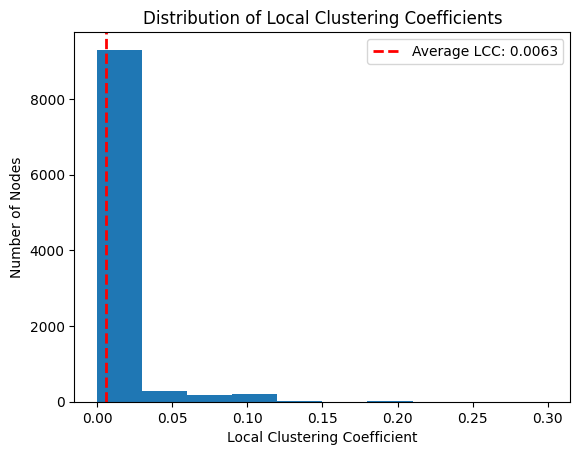

In [ ]:
clustering_coefficients = nx.clustering(S)

# Get LCC distribution
lcc_distribution = [val for node, val in clustering_coefficients.items()]  # Extract LCC values

# Calculate average local clustering coefficient
average_lcc = nx.average_clustering(S)

plt.hist(lcc_distribution)
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Local Clustering Coefficients")

# Add reference line for average LCC
plt.axvline(x=average_lcc, color='r', linestyle='dashed', linewidth=2, label=f'Average LCC: {average_lcc:.4f}')
plt.legend()
plt.show()

In [ ]:
print("average local clustering coefficient:",average_local_clustering)

average local clustering coefficient: 0.006340017367287933


In [ ]:
# global clustering coeffecient of nodes
global_clustering = np.mean(list(nx.clustering(S).values()))

In [ ]:
print("Global clustering coefficient:",global_clustering)

Global clustering coefficient: 0.006340017367287851


In [ ]:
if(S.is_directed()):
  print("Reciprocity: ",nx.reciprocity(S))
else:
  print("Reciprocity: 1.0")


Reciprocity: 1.0


In [ ]:
def is_reciprocal(S, node1, node2):
    return S.has_edge(node2, node1)

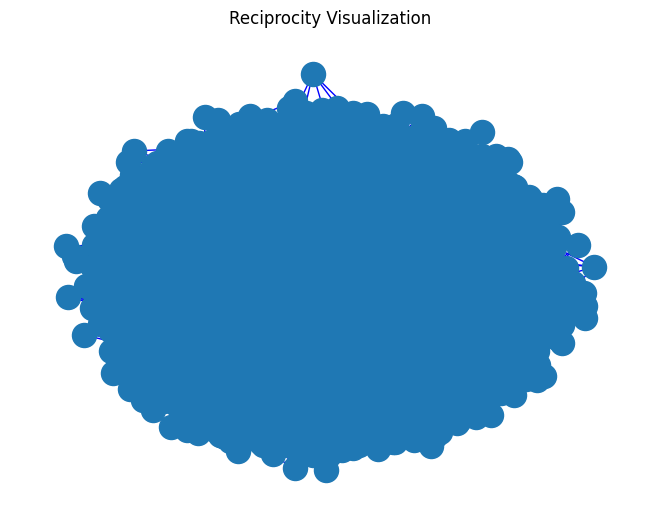

In [ ]:
edge_colors = []
for edge in S.edges():
    if is_reciprocal(S, edge[0], edge[1]):
        edge_colors.append('blue')  # Color for reciprocal edges
    else:
        edge_colors.append('red')  # Color for non-reciprocal edges

# Create the plot with edge coloring based on reciprocity
nx.draw(S, nodelist=S.nodes(), edge_color=edge_colors, with_labels=False)
plt.title("Reciprocity Visualization")
plt.axis('off')  # Hide unnecessary axis

plt.show()

In [ ]:

#Transitivity
transitivity=nx.transitivity(S)


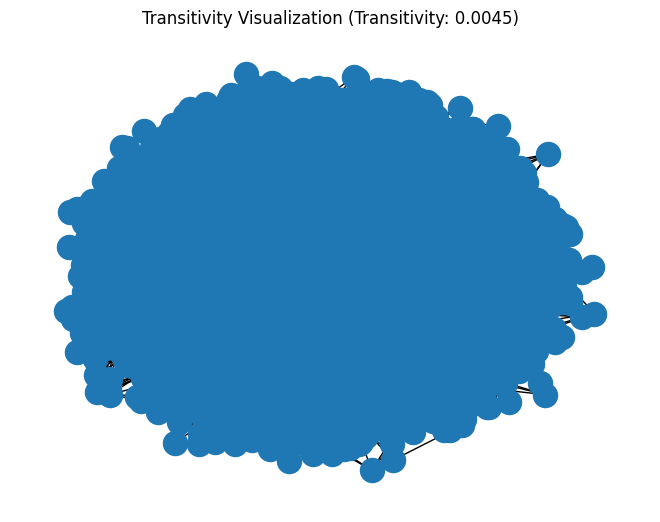

In [ ]:
# Create the plot with the sampled subgraph
nx.draw(S, nodelist=S.nodes(), with_labels=False)
plt.title(f"Transitivity Visualization (Transitivity: {transitivity:.4f})")
plt.axis('off')  # Hide unnecessary axis

plt.show()

In [ ]:

print("transitivity:",transitivity)

transitivity: 0.004494219427426907


In [ ]:

# Comparison (Optional)
if average_local_clustering > global_clustering:
    print("The average local clustering coefficient is higher than the global clustering coefficient.")
elif average_local_clustering < global_clustering:
    print("The average local clustering coefficient is lower than the global clustering coefficient.")
else:
    print("The average local clustering coefficient is equal to the global clustering coefficient.")


The average local clustering coefficient is higher than the global clustering coefficient.


In [ ]:

def find_giant_component(network):
    # Get the connected components
    components = list(nx.connected_components(network))

    # Find the largest component (giant component)
    giant_component = max(components, key=len)

    return giant_component

# Find the giant component in the scale-free network S
giant_component = find_giant_component(S)

# Print the size of the giant component
print("Size of the giant component:", len(giant_component))

Size of the giant component: 10000


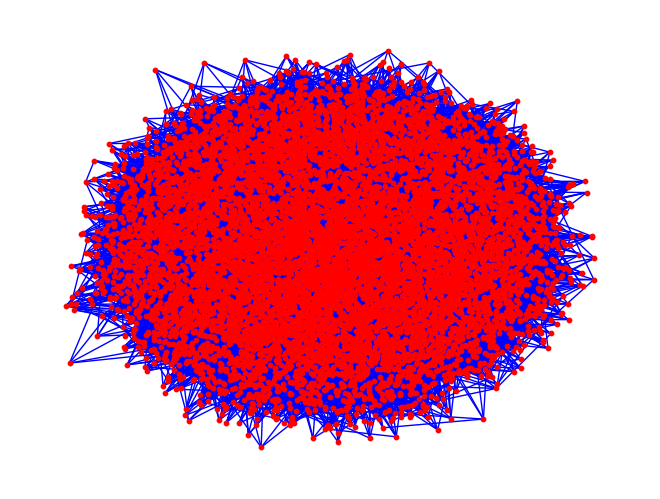

In [ ]:
# Create a subgraph consisting of the giant component
giant_component_graph = S.subgraph(giant_component)

# Draw the giant component
nx.draw(giant_component_graph, node_color='r', edge_color='b', node_size=10)
plt.show()

In [5]:

def assign_activation_probabilities(G):
    # Initialize a dictionary to store activation probabilities
    activation_probs = {}

    # Assign random probabilities for each node's neighbors
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        probabilities = [random.random() for _ in neighbors]

        # Normalize probabilities
        total_prob = sum(probabilities)
        probabilities = [prob / total_prob for prob in probabilities]

        # Store probabilities for each neighbor
        activation_probs[node] = dict(zip(neighbors, probabilities))

    return activation_probs


In [15]:
def visualize_network(network, activated_nodes):
    node_colors = ['blue' if node in activated_nodes else 'red' for node in network.nodes()]
    nx.draw(network, with_labels=False, node_color=node_colors)
    plt.show()

Iteration: # 1
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  3


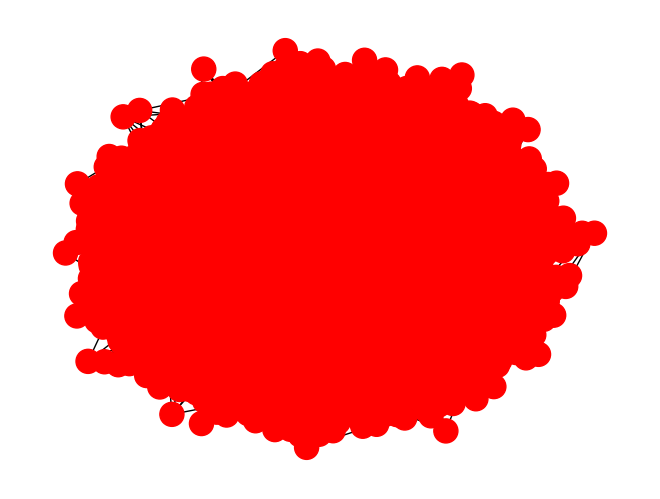

No. of nodes with information before Step: # 2  is  3
No. of nodes with information after Step: #:  2  is  5


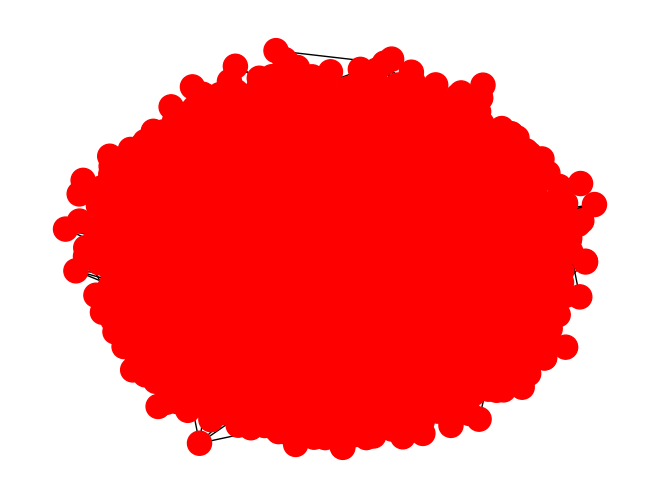

No. of nodes with information before Step: # 3  is  5
No. of nodes with information after Step: #:  3  is  6


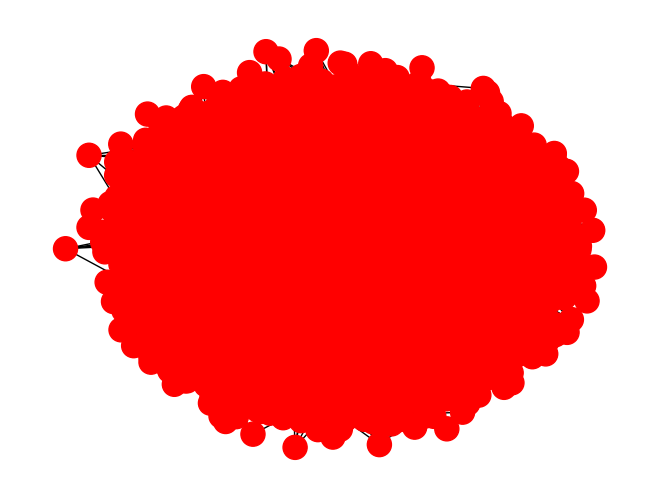

No. of nodes with information before Step: # 4  is  6
No. of nodes with information after Step: #:  4  is  7


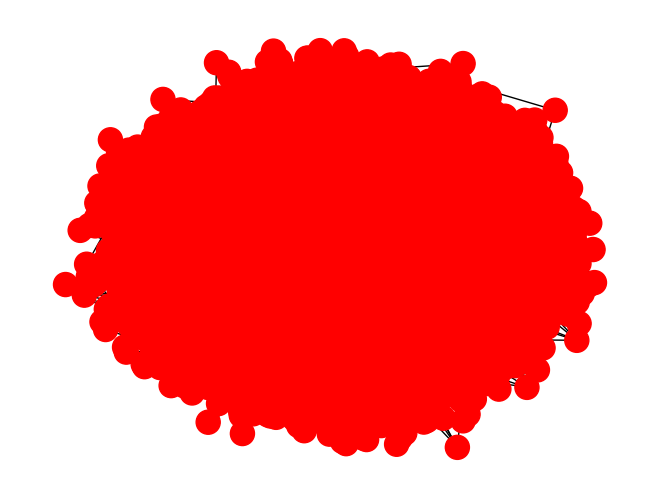

No. of nodes with information before Step: # 5  is  7
No. of nodes with information after Step: #:  5  is  9


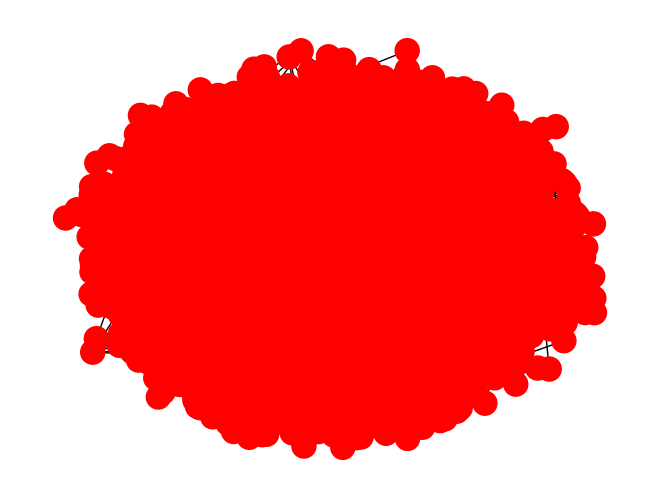

No. of nodes with information before Step: # 6  is  9
No. of nodes with information after Step: #:  6  is  12


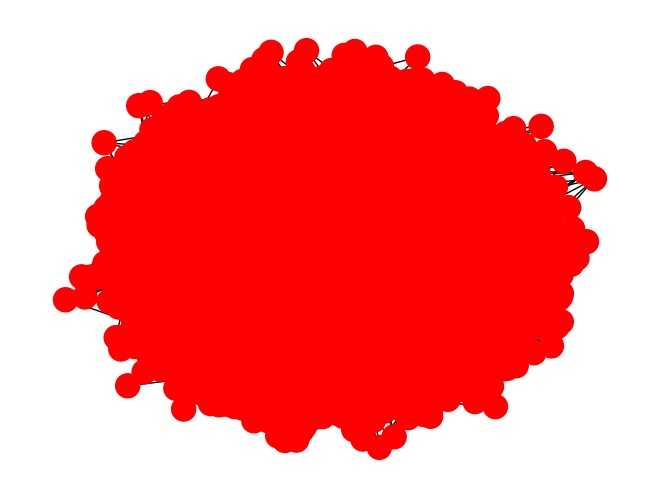

No. of nodes with information before Step: # 7  is  12
No. of nodes with information after Step: #:  7  is  16


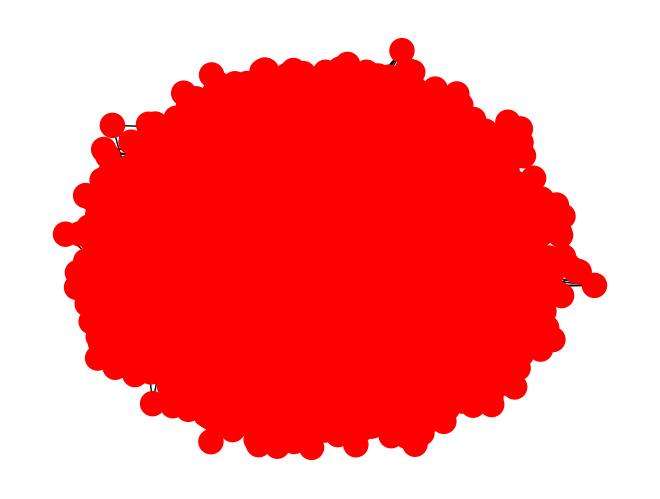

No. of nodes with information before Step: # 8  is  16
No. of nodes with information after Step: #:  8  is  21


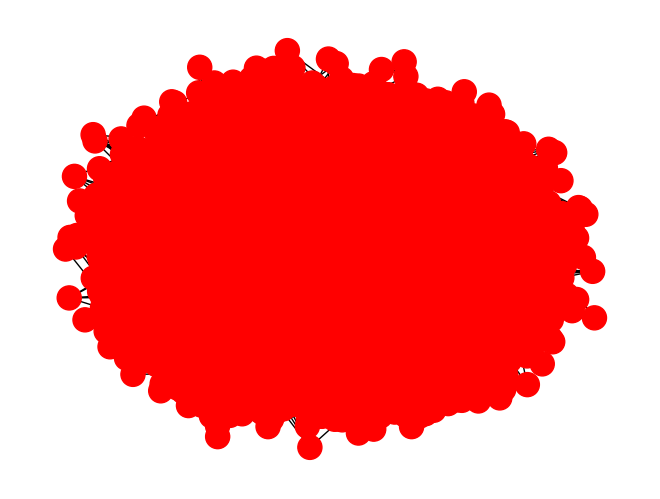

No. of nodes with information before Step: # 9  is  21
No. of nodes with information after Step: #:  9  is  24


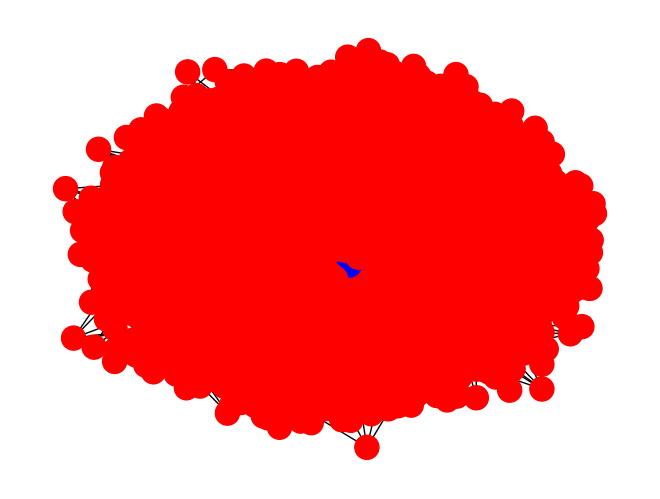

No. of nodes with information before Step: # 10  is  24
No. of nodes with information after Step: #:  10  is  26


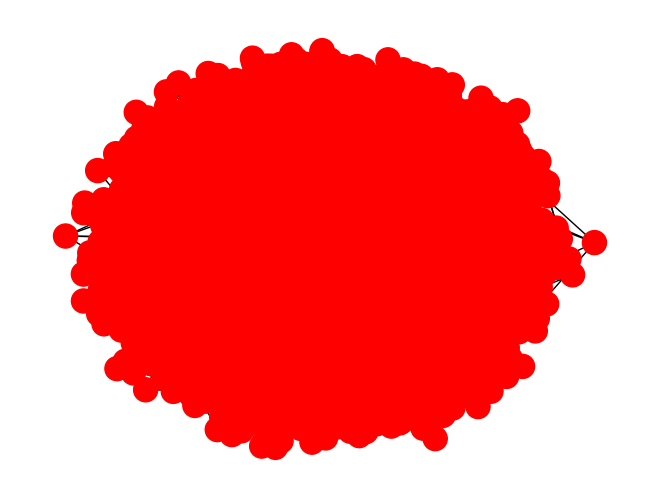

No. of nodes with information before Step: # 11  is  26
No. of nodes with information after Step: #:  11  is  28


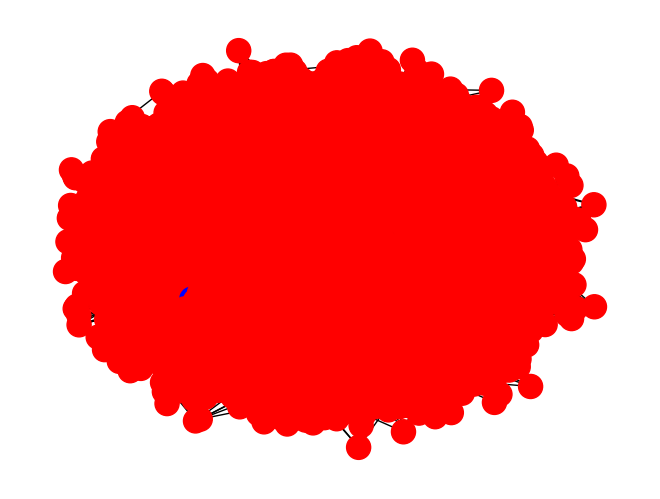

No. of nodes with information before Step: # 12  is  28
No. of nodes with information after Step: #:  12  is  28


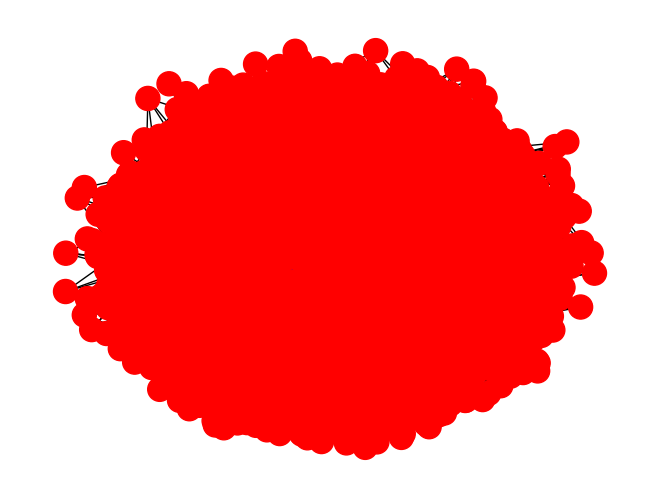

Iteration: # 2
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


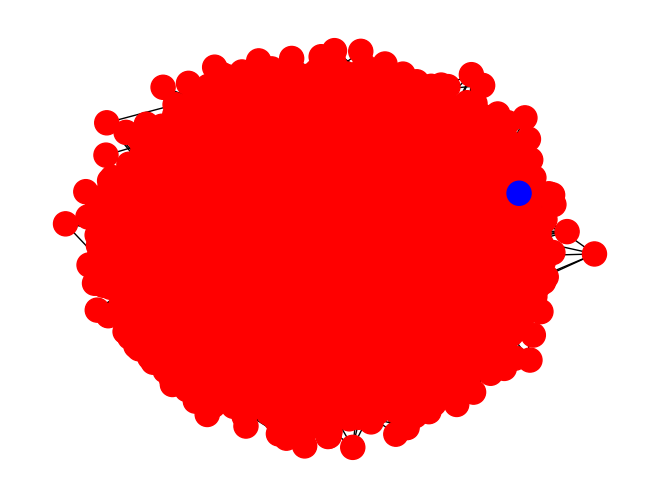

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  4


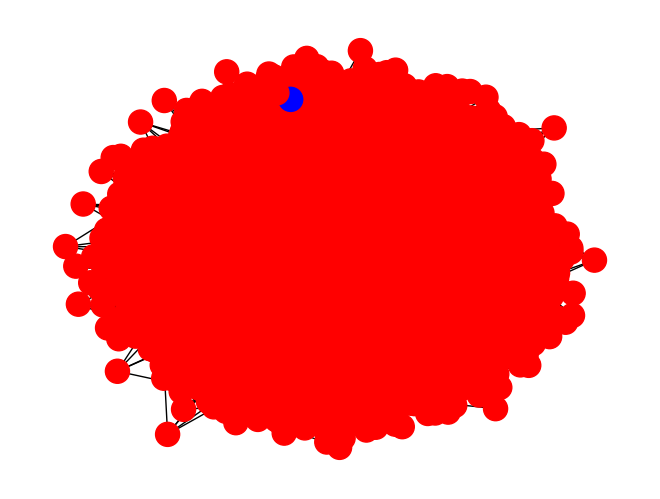

No. of nodes with information before Step: # 3  is  4
No. of nodes with information after Step: #:  3  is  7


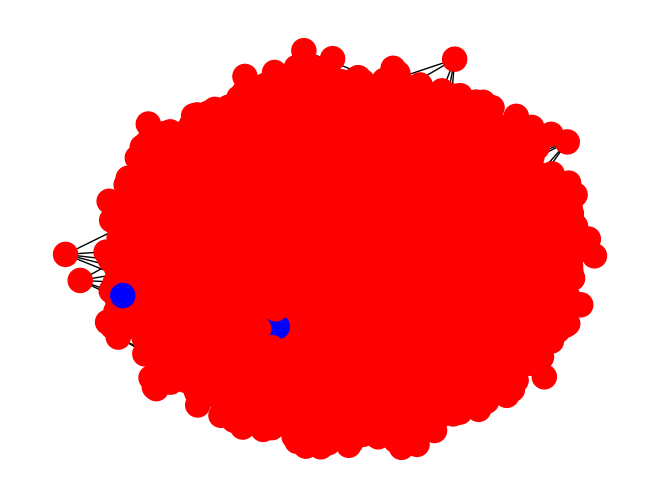

No. of nodes with information before Step: # 4  is  7
No. of nodes with information after Step: #:  4  is  8


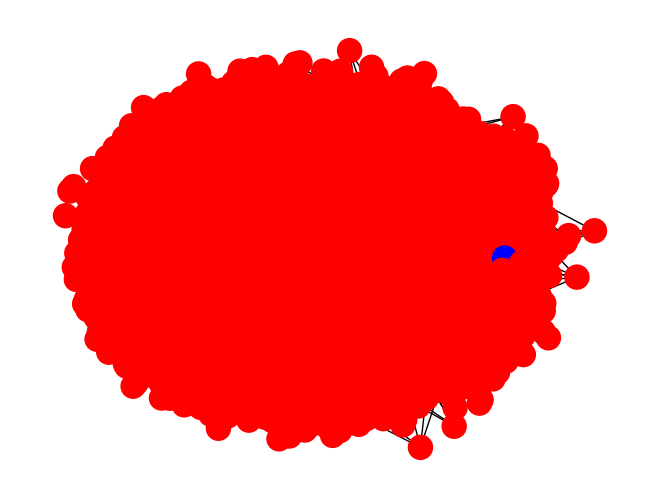

No. of nodes with information before Step: # 5  is  8
No. of nodes with information after Step: #:  5  is  9


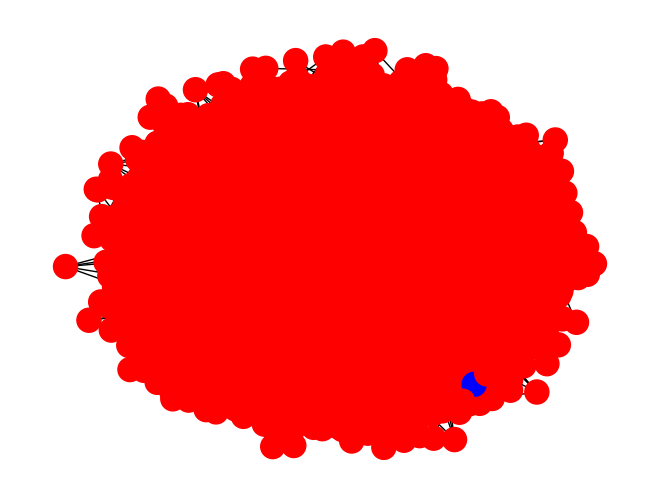

No. of nodes with information before Step: # 6  is  9
No. of nodes with information after Step: #:  6  is  10


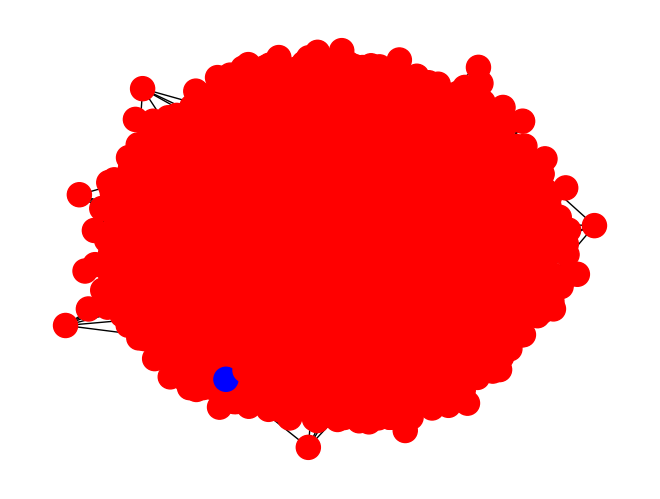

No. of nodes with information before Step: # 7  is  10
No. of nodes with information after Step: #:  7  is  12


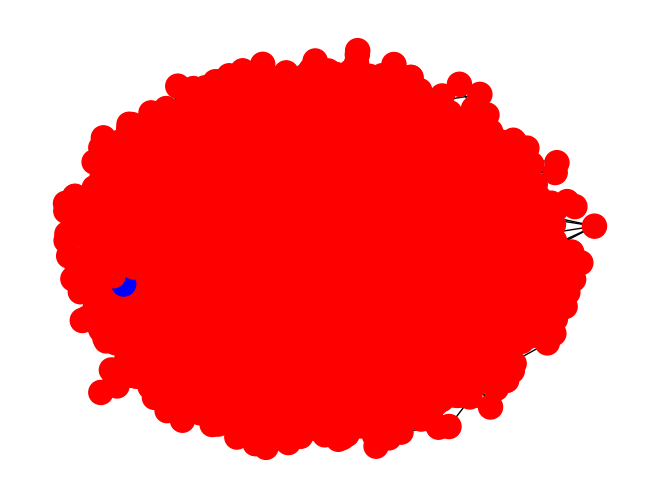

No. of nodes with information before Step: # 8  is  12
No. of nodes with information after Step: #:  8  is  15


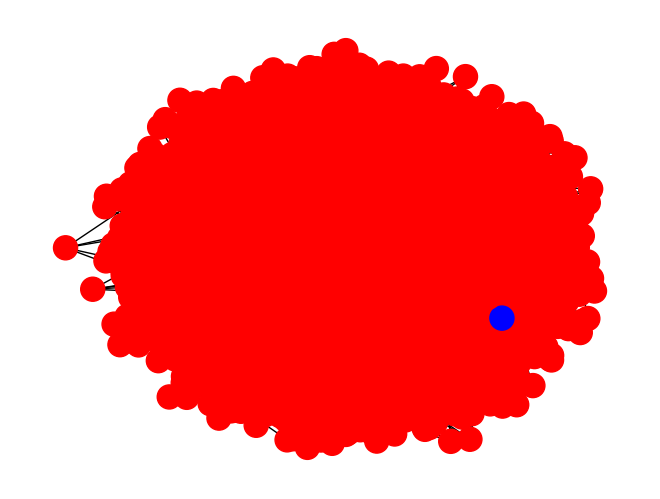

No. of nodes with information before Step: # 9  is  15
No. of nodes with information after Step: #:  9  is  19


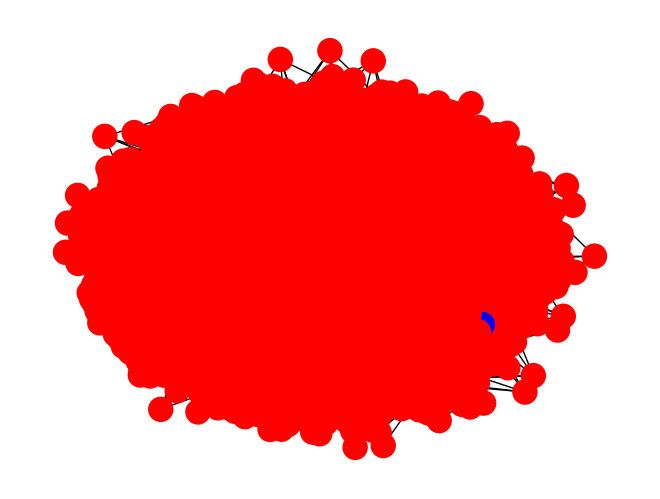

No. of nodes with information before Step: # 10  is  19
No. of nodes with information after Step: #:  10  is  20


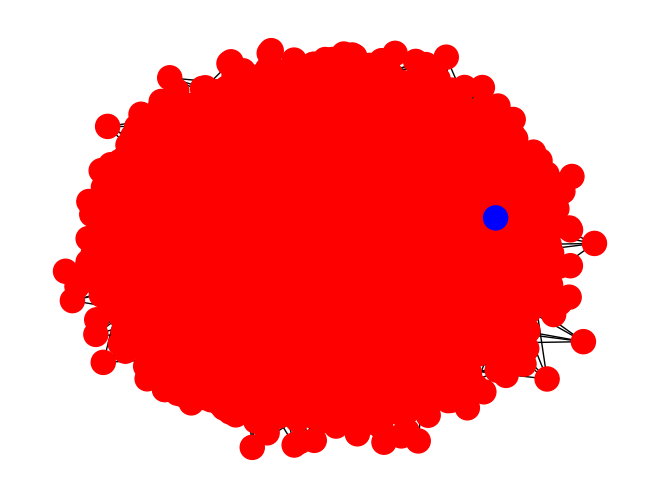

No. of nodes with information before Step: # 11  is  20
No. of nodes with information after Step: #:  11  is  21


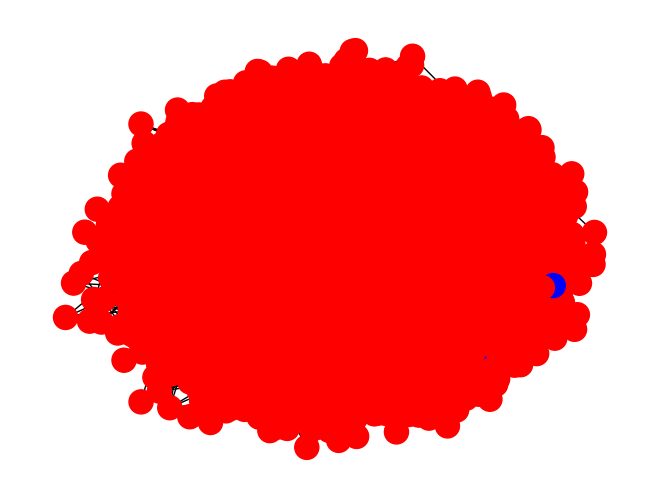

No. of nodes with information before Step: # 12  is  21
No. of nodes with information after Step: #:  12  is  21


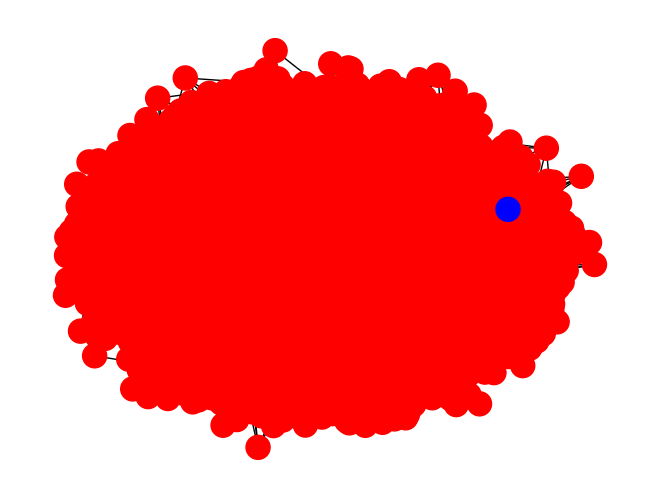

Iteration: # 3
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  4


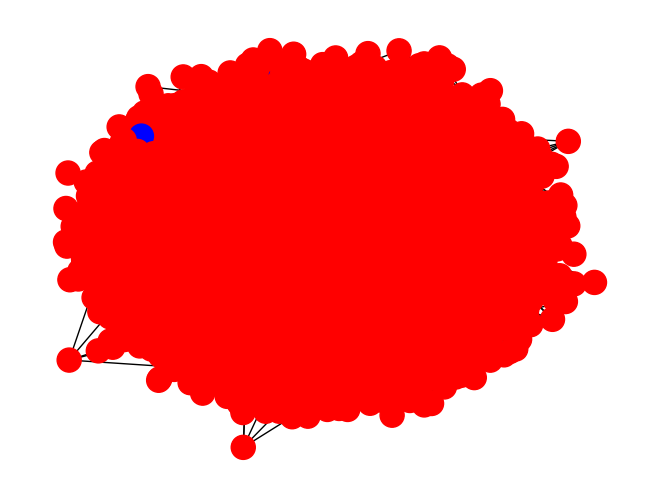

No. of nodes with information before Step: # 2  is  4
No. of nodes with information after Step: #:  2  is  5


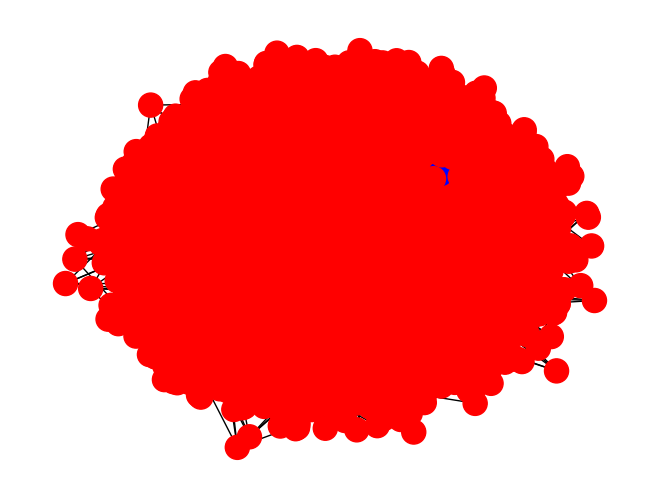

No. of nodes with information before Step: # 3  is  5
No. of nodes with information after Step: #:  3  is  5


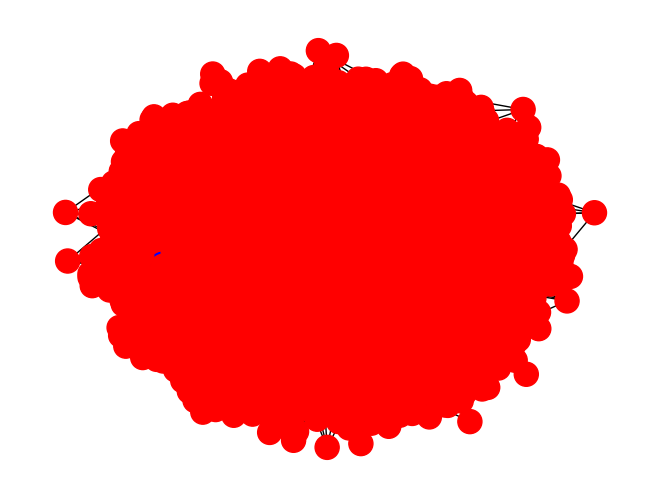

Iteration: # 4
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  3


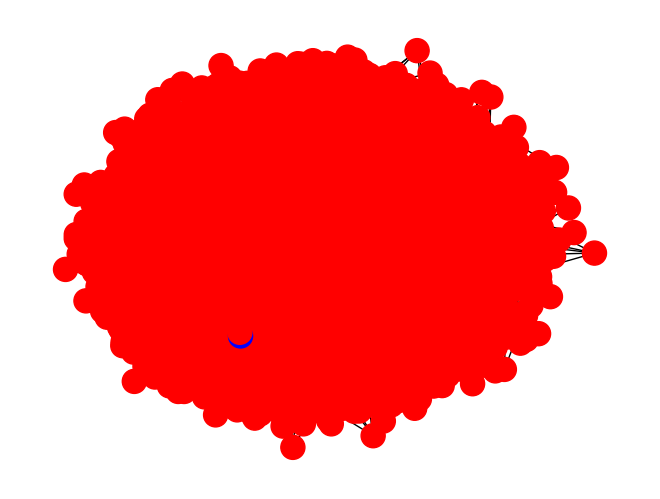

No. of nodes with information before Step: # 2  is  3
No. of nodes with information after Step: #:  2  is  4


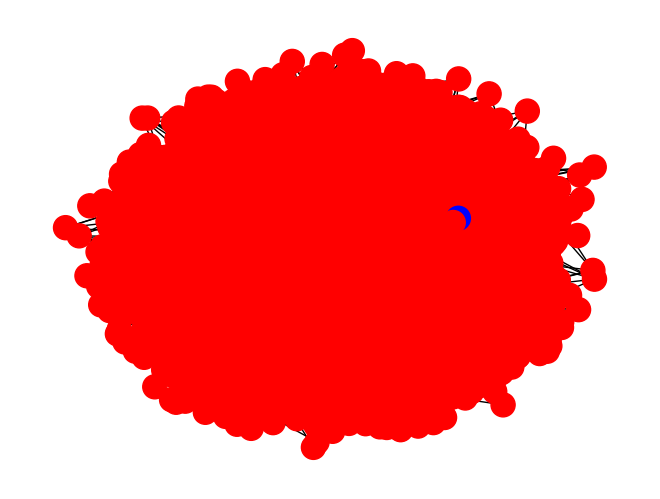

No. of nodes with information before Step: # 3  is  4
No. of nodes with information after Step: #:  3  is  7


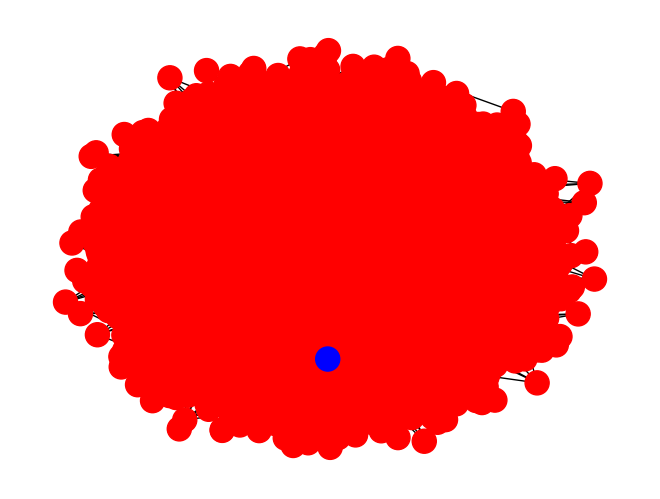

No. of nodes with information before Step: # 4  is  7
No. of nodes with information after Step: #:  4  is  10


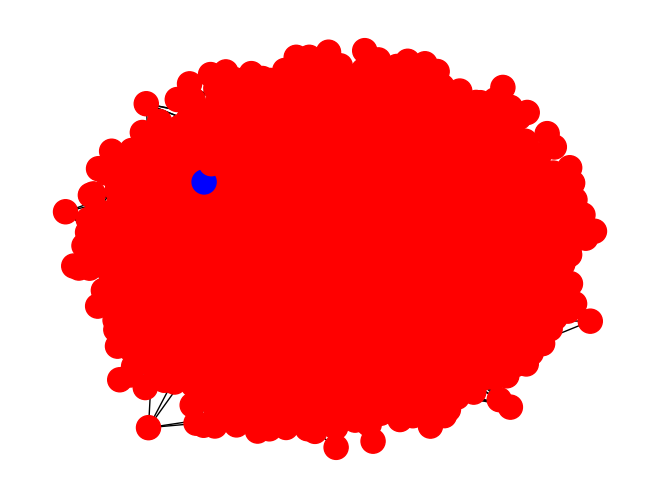

No. of nodes with information before Step: # 5  is  10
No. of nodes with information after Step: #:  5  is  13


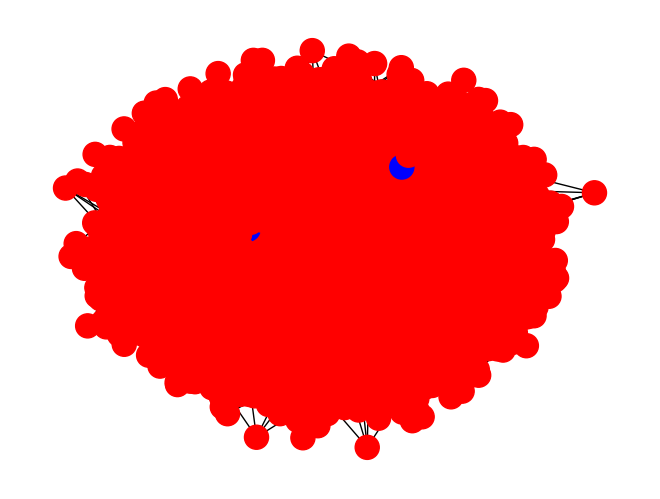

No. of nodes with information before Step: # 6  is  13
No. of nodes with information after Step: #:  6  is  14


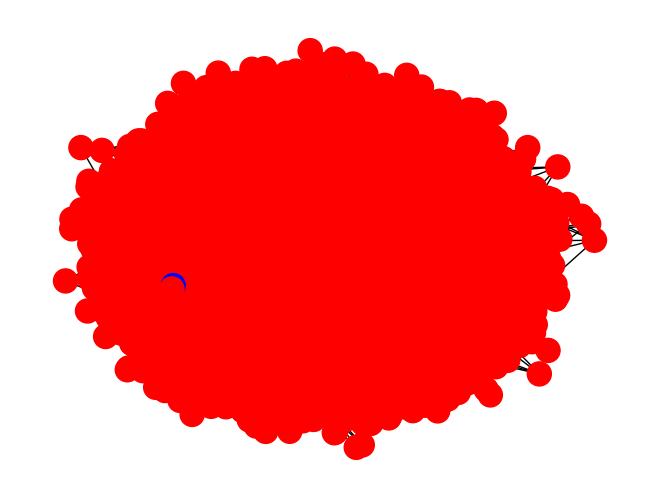

No. of nodes with information before Step: # 7  is  14
No. of nodes with information after Step: #:  7  is  14


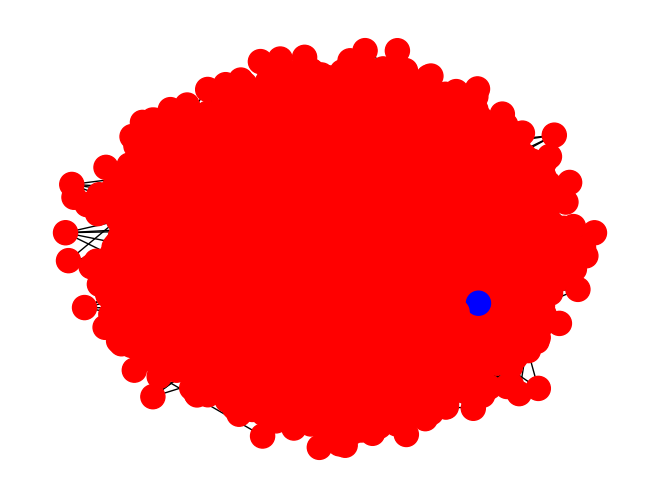

Iteration: # 5
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


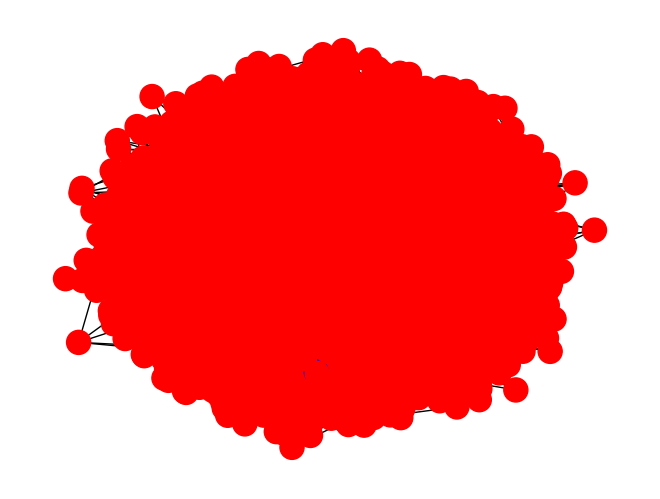

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  2


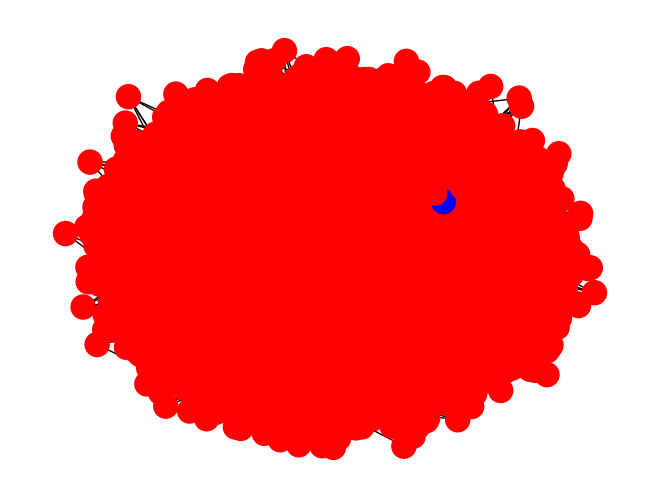

Iteration: # 6
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  3


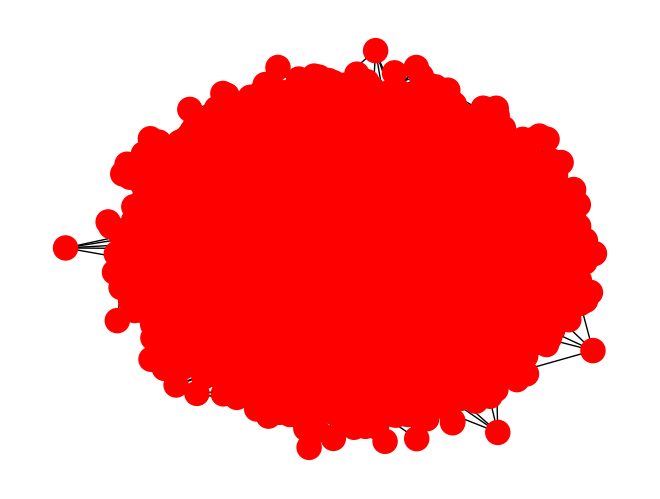

No. of nodes with information before Step: # 2  is  3
No. of nodes with information after Step: #:  2  is  8


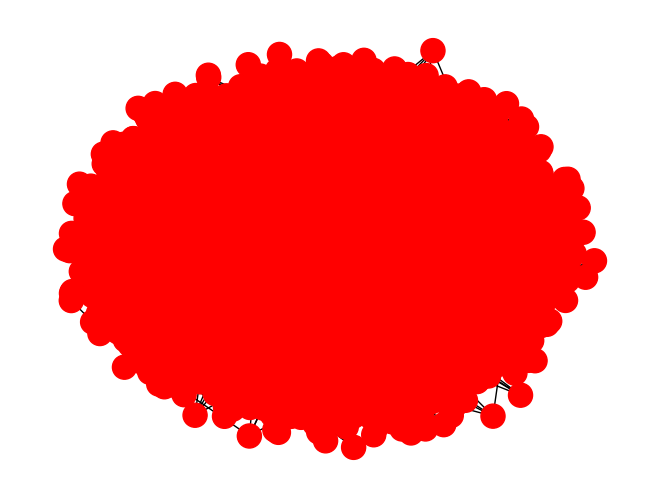

No. of nodes with information before Step: # 3  is  8
No. of nodes with information after Step: #:  3  is  12


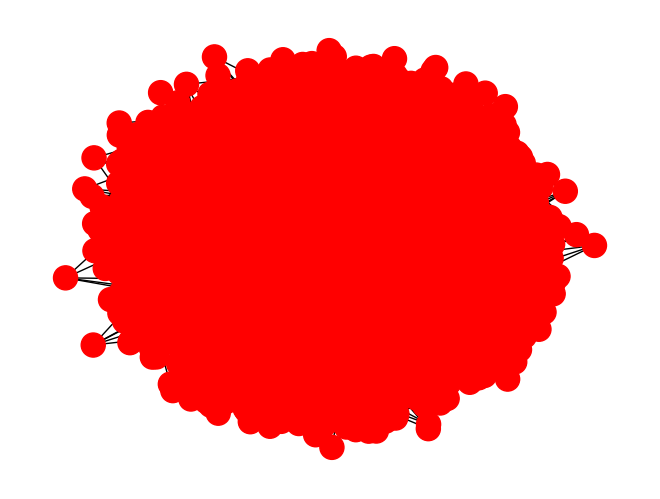

No. of nodes with information before Step: # 4  is  12
No. of nodes with information after Step: #:  4  is  16


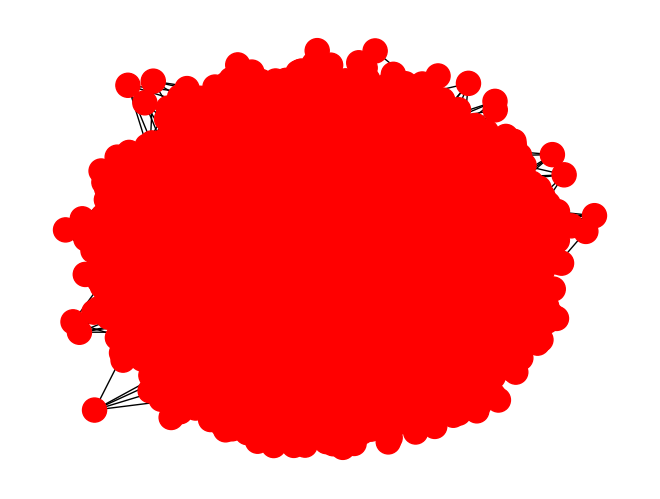

No. of nodes with information before Step: # 5  is  16
No. of nodes with information after Step: #:  5  is  19


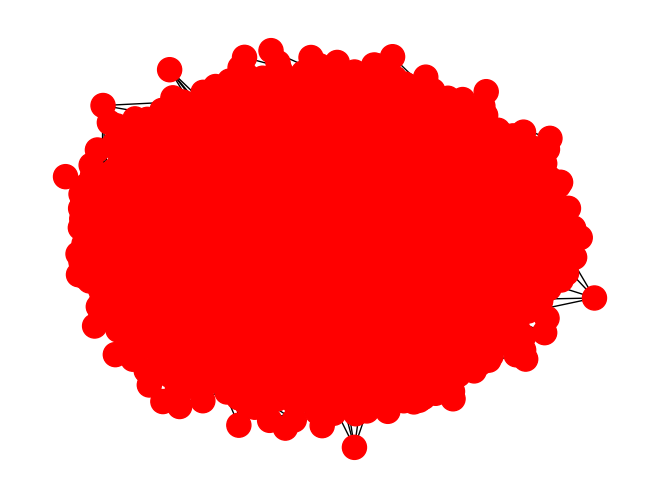

No. of nodes with information before Step: # 6  is  19
No. of nodes with information after Step: #:  6  is  25


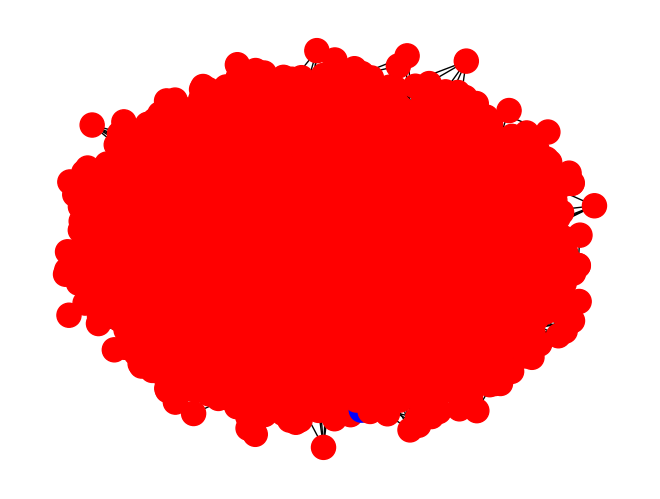

No. of nodes with information before Step: # 7  is  25
No. of nodes with information after Step: #:  7  is  29


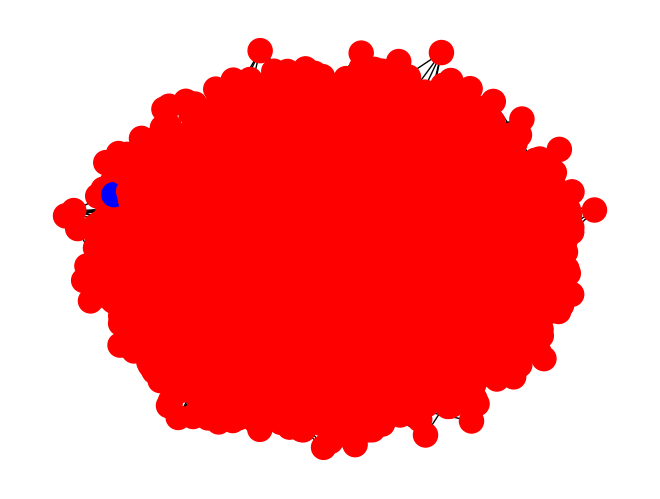

No. of nodes with information before Step: # 8  is  29
No. of nodes with information after Step: #:  8  is  30


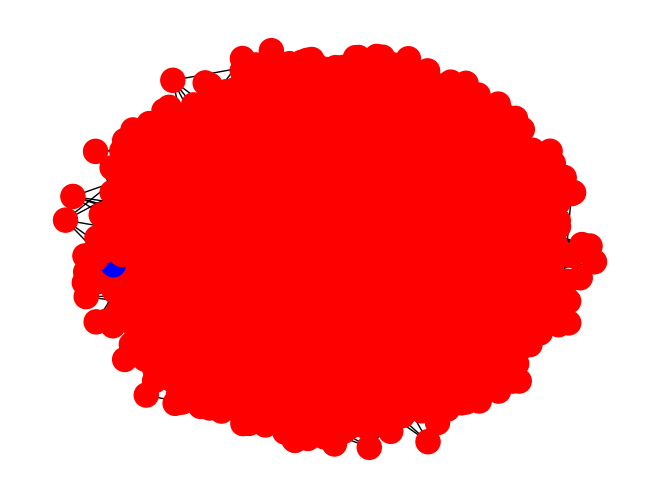

No. of nodes with information before Step: # 9  is  30
No. of nodes with information after Step: #:  9  is  31


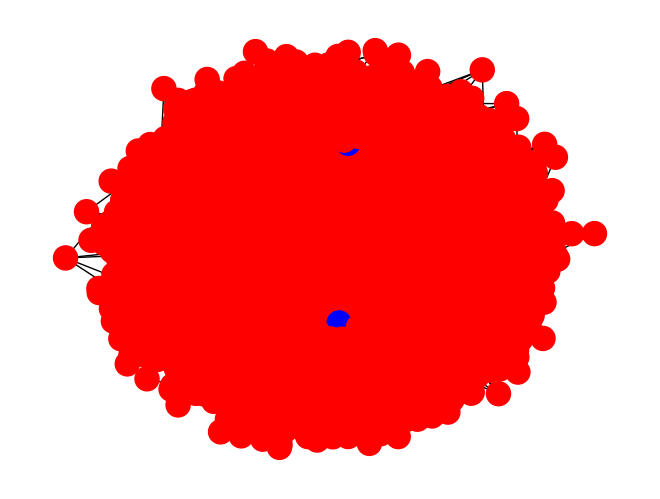

No. of nodes with information before Step: # 10  is  31
No. of nodes with information after Step: #:  10  is  31


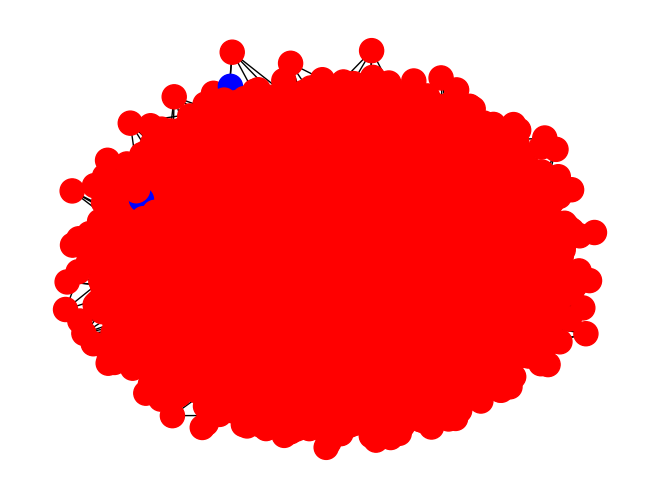

Iteration: # 7
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  2


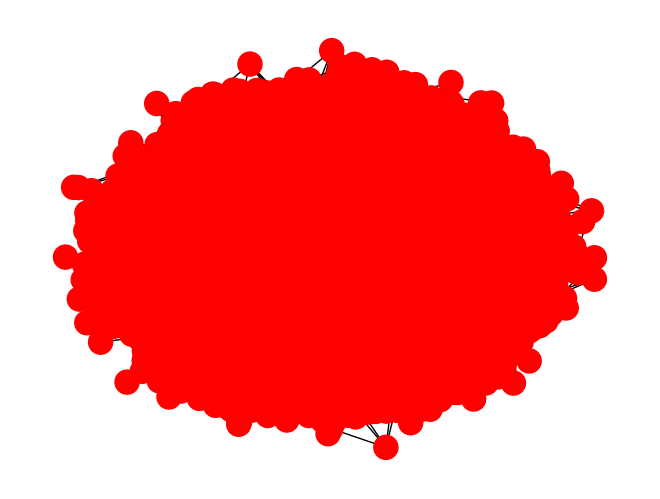

No. of nodes with information before Step: # 2  is  2
No. of nodes with information after Step: #:  2  is  3


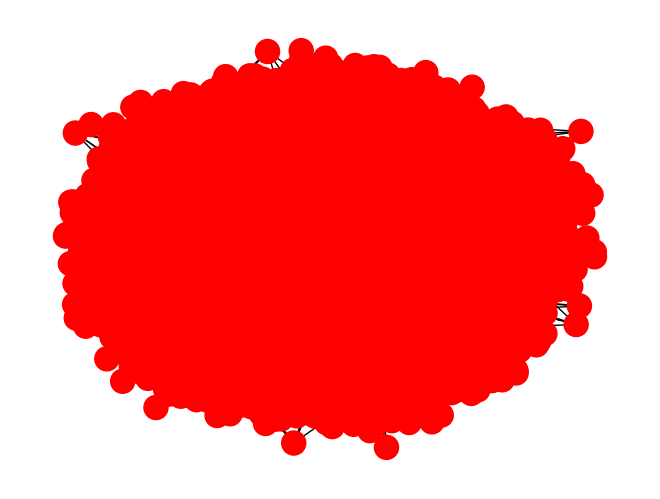

No. of nodes with information before Step: # 3  is  3
No. of nodes with information after Step: #:  3  is  6


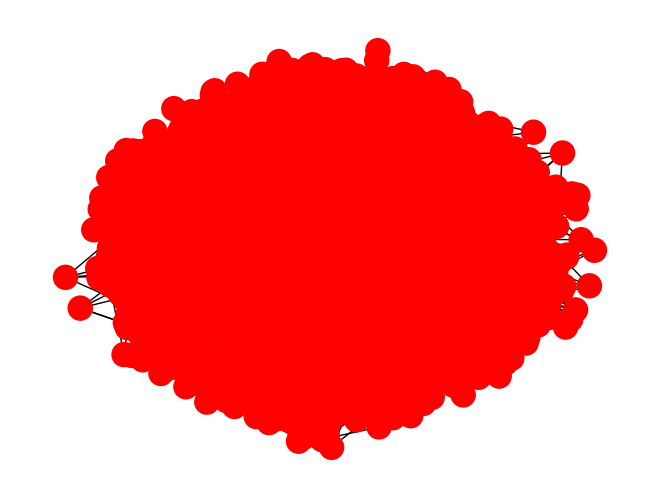

No. of nodes with information before Step: # 4  is  6
No. of nodes with information after Step: #:  4  is  7


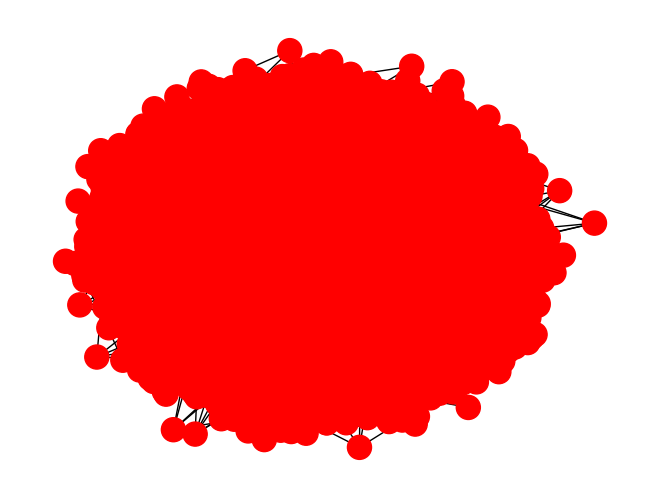

No. of nodes with information before Step: # 5  is  7
No. of nodes with information after Step: #:  5  is  9


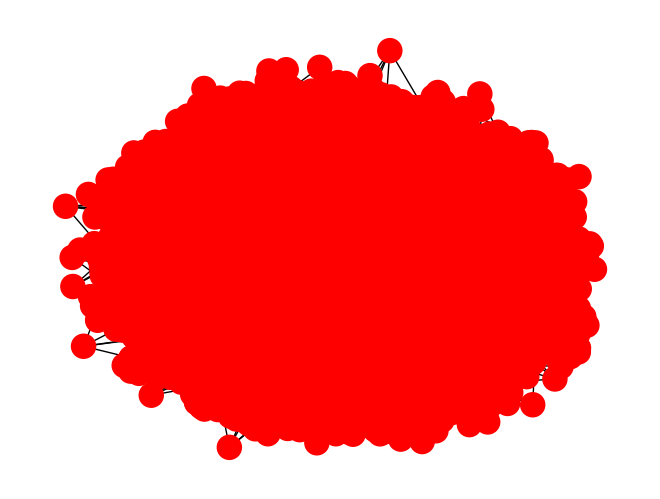

No. of nodes with information before Step: # 6  is  9
No. of nodes with information after Step: #:  6  is  11


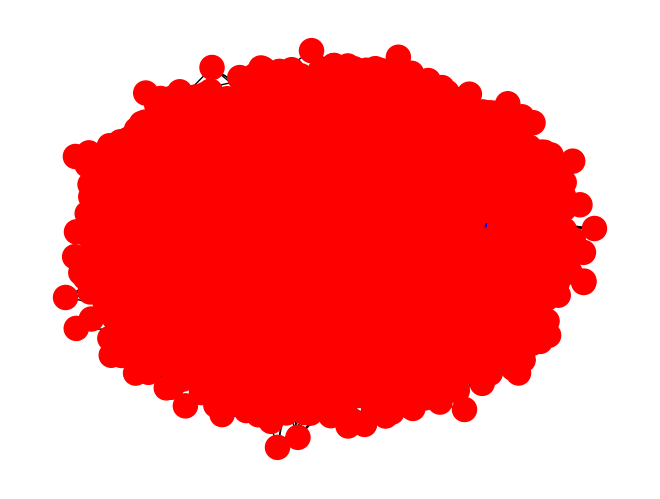

No. of nodes with information before Step: # 7  is  11
No. of nodes with information after Step: #:  7  is  12


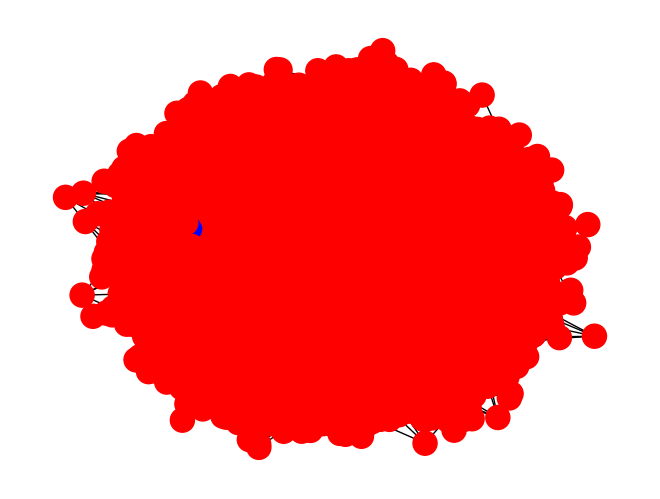

No. of nodes with information before Step: # 8  is  12
No. of nodes with information after Step: #:  8  is  13


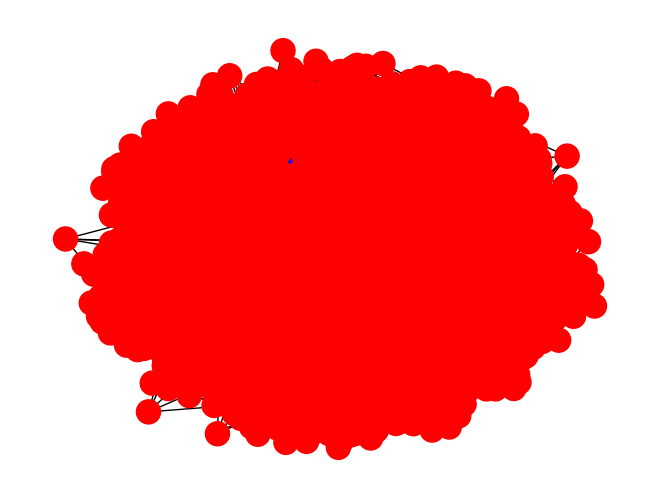

No. of nodes with information before Step: # 9  is  13
No. of nodes with information after Step: #:  9  is  14


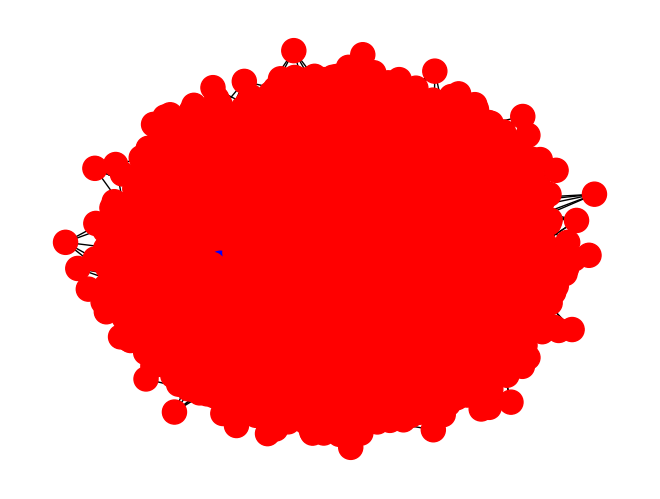

No. of nodes with information before Step: # 10  is  14
No. of nodes with information after Step: #:  10  is  17


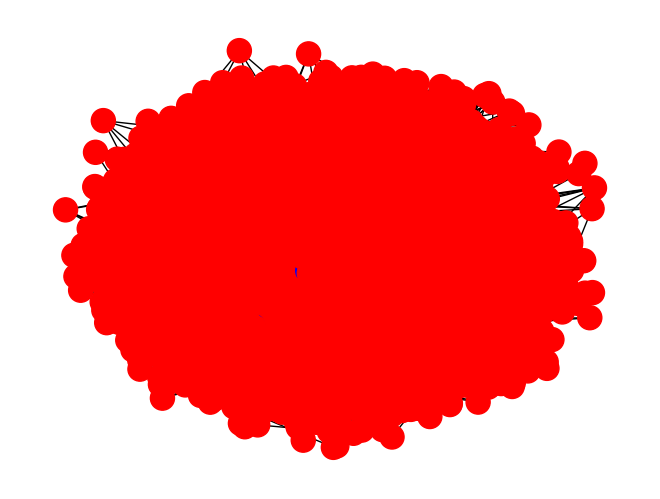

No. of nodes with information before Step: # 11  is  17
No. of nodes with information after Step: #:  11  is  19


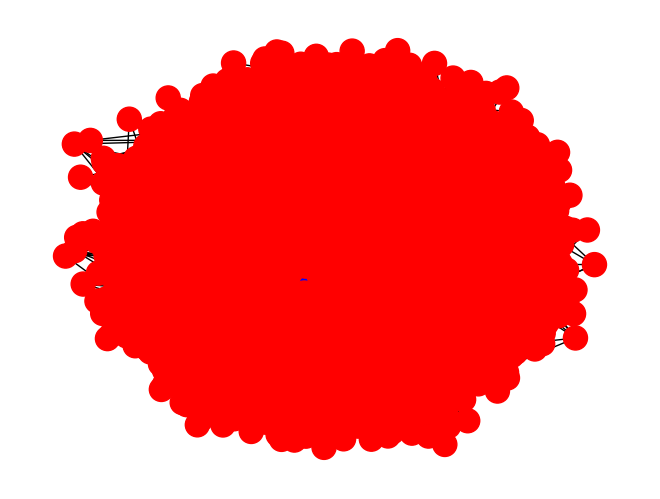

No. of nodes with information before Step: # 12  is  19
No. of nodes with information after Step: #:  12  is  19


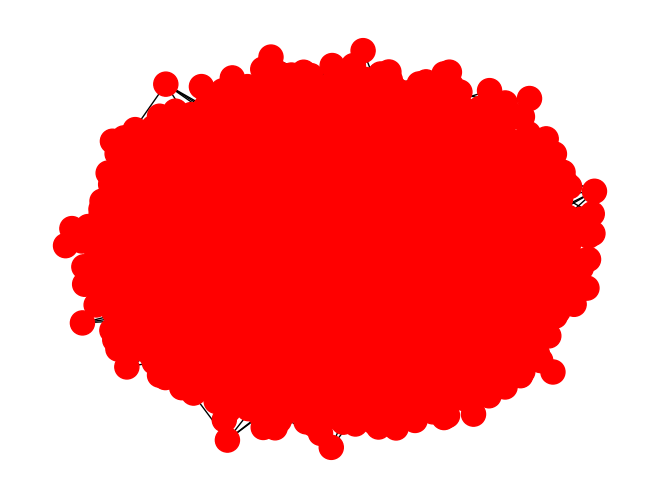

Iteration: # 8
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  1


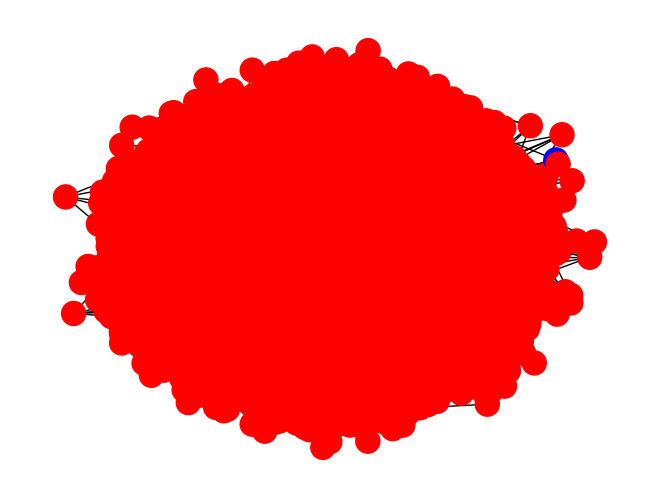

Iteration: # 9
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  1


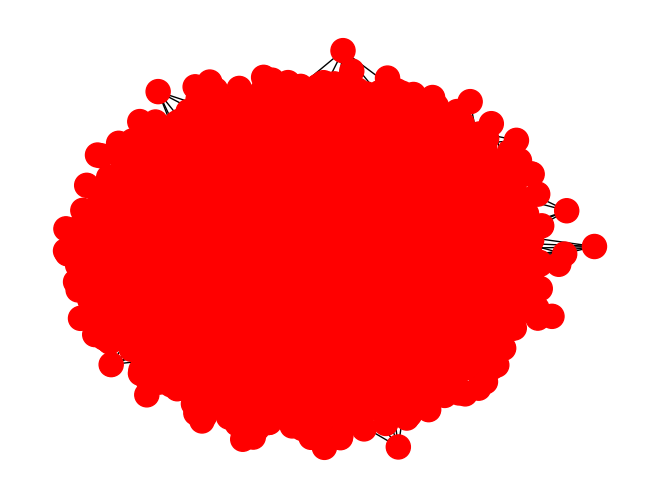

Iteration: # 10
No. of nodes with information before Step: # 1  is  1
No. of nodes with information after Step: #:  1  is  1


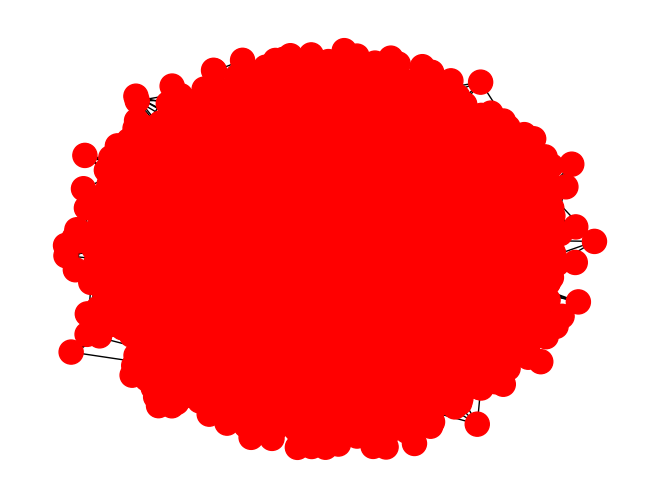

In [16]:

def run_ICM(network, start_node, activation_probs):
    activated_nodes = set()
    activated_nodes.add(start_node)
    newly_activated_nodes = set([start_node])
    steps = 0
    while newly_activated_nodes:
        steps += 1
        print("No. of nodes with information before Step: #",steps," is ",len(activated_nodes))
        currently_activated_nodes = newly_activated_nodes.copy()
        newly_activated_nodes.clear()
        for node in currently_activated_nodes:
            for neighbor in network.neighbors(node):
                if neighbor not in activated_nodes:
                    # Activate the neighbor with the assigned probability
                    if random.uniform(0, 1) <= activation_probs[node][neighbor]:
                        newly_activated_nodes.add(neighbor)
                        activated_nodes.add(neighbor)
        print("No. of nodes with information after Step: #: ",steps," is ",len(activated_nodes))
        visualize_network(network, activated_nodes)  # Visualize the network at each step

    return steps

def calculate_average_steps(network, activation_probs, num_trials=10):
    total_steps = 0
    for _ in range(num_trials):
        start_node = random.choice(list(network.nodes()))
        print("Iteration: #",_+1)
        total_steps += run_ICM(network, start_node, activation_probs)
    average_steps = total_steps / num_trials
    return average_steps

# Assign random activation probabilities to edges
activation_probs = assign_activation_probabilities(S)

# Calculate the average number of steps required
avg_steps = calculate_average_steps(S, activation_probs, 10)


In [17]:

print("Average number of steps required:", avg_steps)

Average number of steps required: 6.1


In [18]:
print(S.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 16), (0, 19), (0, 23), (0, 30), (0, 34), (0, 36), (0, 38), (0, 40), (0, 46), (0, 49), (0, 50), (0, 60), (0, 65), (0, 72), (0, 73), (0, 74), (0, 78), (0, 81), (0, 84), (0, 86), (0, 88), (0, 89), (0, 99), (0, 107), (0, 113), (0, 114), (0, 133), (0, 148), (0, 156), (0, 157), (0, 159), (0, 160), (0, 162), (0, 164), (0, 178), (0, 191), (0, 199), (0, 204), (0, 235), (0, 243), (0, 260), (0, 268), (0, 272), (0, 291), (0, 294), (0, 312), (0, 316), (0, 328), (0, 340), (0, 344), (0, 354), (0, 379), (0, 380), (0, 384), (0, 406), (0, 439), (0, 462), (0, 474), (0, 491), (0, 493), (0, 508), (0, 517), (0, 531), (0, 542), (0, 547), (0, 583), (0, 590), (0, 602), (0, 606), (0, 615), (0, 624), (0, 631), (0, 664), (0, 668), (0, 669), (0, 670), (0, 709), (0, 718), (0, 720), (0, 726), (0, 727), (0, 738), (0, 803), (0, 811), (0, 815), (0, 826), (0, 843), (0, 854), (0, 867), (0, 887), (0, 948), (0, 958), (0, 968), (0, 973), (0, 990), (0, 996), (0, 10